In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image

from IPython.display import Image, display

from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
from skimage import exposure
import numpy as np
import os
import random
import tensorflow as tf

import matplotlib.pyplot as plt

# from IPython.display import display
# from PIL import Image

Using TensorFlow backend.


In [2]:
# Get images
X = []
for filename in os.listdir('C:/Partition/Varshini/IDS 576/Project/Data/images/Train/'):
    X.append(img_to_array(load_img('C:/Partition/Varshini/IDS 576/Project/Data/images/Train/'+filename)))
X = np.array(X, dtype=float)

# image = load_img('C:/Partition/Varshini/IDS 576/Project/Data/images/Train/01dZiW.jpg', target_size=(256, 256))

In [5]:
# Set up training and test data

# split = int(0.00539*len(X))
split = int(0.00539*len(X))*100

Xtrain = X[:split]
Xtrain = 1.0/255*Xtrain

In [6]:
Xtrain.shape

(5000, 256, 256, 3)

In [7]:
#Design the neural network
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

# Finish model
model.compile(optimizer='rmsprop', loss='mse')

# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True)


In [8]:
# Generate training data
batch_size = 25

# batch_size = 50

def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

In [ ]:
# Train model
# TensorBoard(log_dir='/output')

# model.fit_generator(image_a_b_gen(batch_size), steps_per_epoch=2, epochs=1)
model.fit_generator(image_a_b_gen(batch_size), steps_per_epoch=2*100, epochs=3)

Epoch 1/3
200/200 [==============================] - 4272s 21s/step - loss: 0.0389
Epoch 2/3
170/200 [========================>.....] - ETA: 10:28 - loss: 0.0106

In [103]:
# Test images (Evaluate the model)
Xtest = rgb2lab(1.0/255*X[split:(split*2)])[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X[split:(split*2)])[:,:,:,1:]
Ytest = Ytest / 128

print(Xtest.shape)

print (model.evaluate(Xtest, Ytest, batch_size=batch_size))

(500, 256, 256, 1)
500/500 [==============================] - 187s 373ms/step
0.00986782880499959


In [104]:
# Load black and white images
color_me = []

# for filename in os.listdir('C:/Partition/Varshini/IDS 576/Project/Data/images/Test/'):
#         color_me.append(img_to_array(load_img('C:/Partition/Varshini/IDS 576/Project/Data/images/Test/'+filename)))

for filename in os.listdir('C:/Partition/Varshini/IDS 576/Project/Data/testdata/Validate/'):
        color_me.append(img_to_array(load_img('C:/Partition/Varshini/IDS 576/Project/Data/testdata/Validate/'+filename)))


color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))


In [108]:
# Create colored images from grayscale ones
output = model.predict(color_me)
output = output * 128

In [109]:
# Output colorizations
for i in range(len(output)):
        cur = np.zeros((256, 256, 3))
        cur[:,:,0] = color_me[i][:,:,0]
        cur[:,:,1:] = output[i]
        imsave("C:/Partition/Nachiket/IDS 576/Project/Data/images/Result/img_"+str(i)+".png", lab2rgb(cur))

C:\Users\nachi\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [131]:
zzz = load_img('C:/Partition/Varshini/IDS 576/Project/Data/images/Result_1000/img_0.png', target_size=(256, 256))


# qwerty= rgb2lab(zzz)[:,:,0]
# dfgh = rgb2lab(zzz)[:,:,1:]

# L = rgb2lab(zzz)[:,:,0]
# a = rgb2lab(zzz)[:,:,1]
# b = rgb2lab(zzz)[:,:,2]

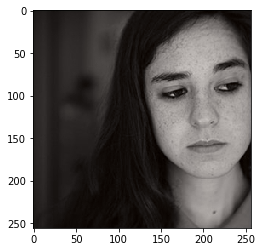

In [132]:
# Original
imgplot = plt.imshow(zzz)

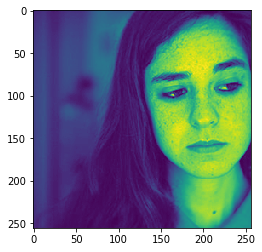

In [121]:
# Grayscale
imgplot = plt.imshow(L)

In [ ]:
# Original
imgplot = plt.imshow(ccc)

In [1]:
# img_eq = exposure.equalize_hist(zzz)